In [1]:
# L1 LASSO REGRESSION

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("sers.csv")

# Separate features and target
X = df.drop(columns=["Conc"])
y = df["Conc"]

# Handle categorical features
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_processed, y_train)

# Predict and evaluate
y_pred = lasso_model.predict(X_test_processed)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Lasso Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


📈 Lasso Regression Performance:
R² Score: 0.9836
MAE: 13660.0460
RMSE: 21598.8228


C:\Users\Siddharth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+11, tolerance: 3.024e+09
  model = cd_fast.enet_coordinate_descent(


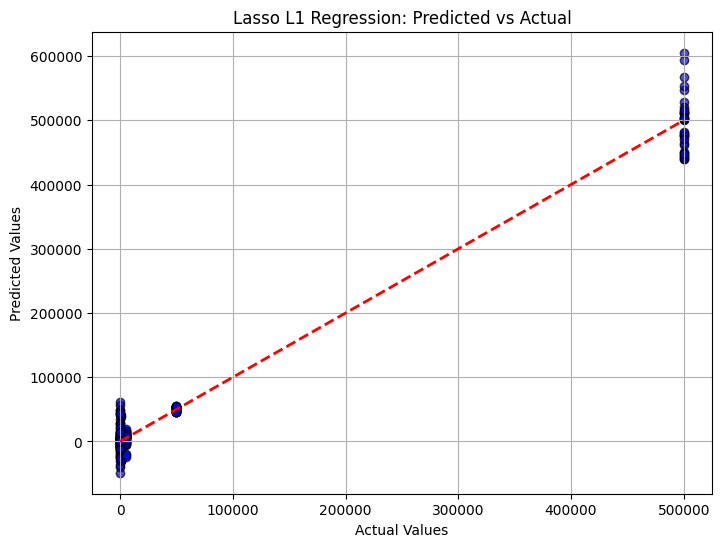

In [4]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso L1 Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [5]:
# L2 RIDGE REGRESSION

Missing values in the dataset:
 W1                0
W2                0
W3                0
W4                0
W5                0
                 ..
Matrix_Inf        0
Matrix_P. milk    0
Matrix_Prw1       0
Matrix_Prw2       0
Matrix_TAP        0
Length: 525, dtype: int64
Features shape: (1180, 524), Target shape: (1180,)
Polynomial features shape: (1180, 138075)
📈 Ridge Regression Performance:
R² Score: 0.8746
MAE: 0.0138
RMSE: 0.0457


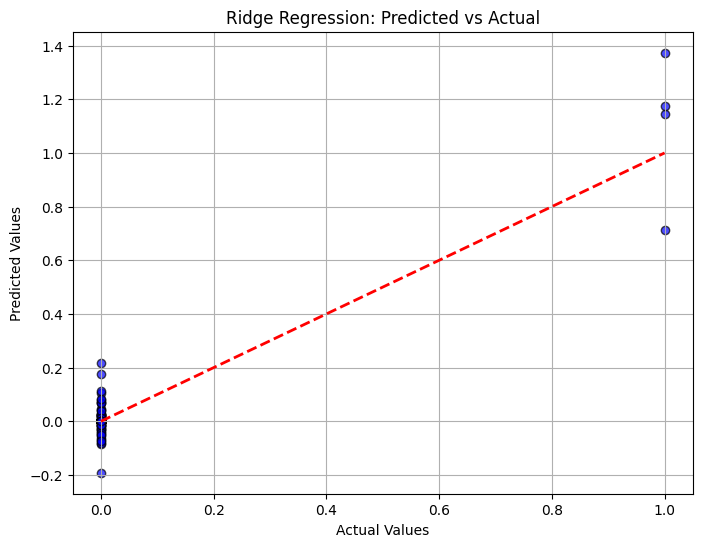

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('sers.csv')

# Handle categorical columns (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Check for missing values in the dataset
print("Missing values in the dataset:\n", data.isnull().sum())

# Split data into features and target
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Check the shape of features and target
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree if needed
X_poly = poly.fit_transform(X)

# Check the shape of the polynomial features
print(f"Polynomial features shape: {X_poly.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge regression model on scaled features (no scaling for y)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("📈 Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")

# Scatter plot to visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [7]:
# Log Transformed L2 Regression

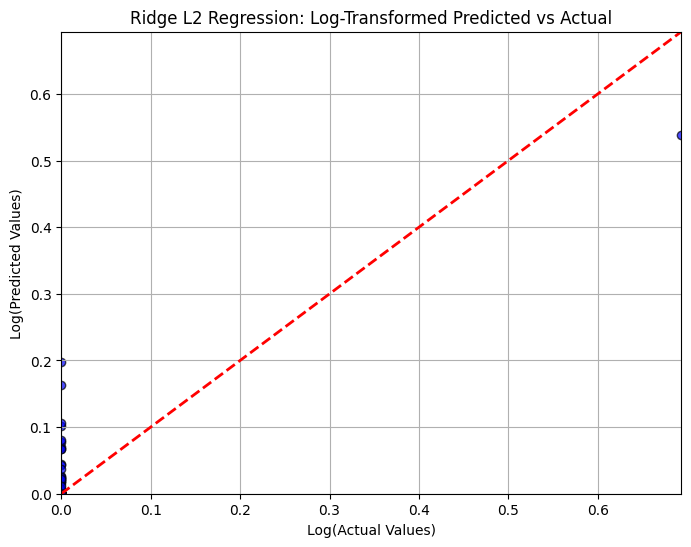

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Apply log transformation to both actual and predicted values
log_y_test = np.log1p(y_test)  # log(1 + y) to handle zero values
log_y_pred_ridge = np.log1p(y_pred_ridge)

# Scatter plot of log-transformed actual vs predicted values
plt.scatter(log_y_test, log_y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)

# Plot the perfect prediction line
plt.plot([log_y_test.min(), log_y_test.max()], [log_y_test.min(), log_y_test.max()],
         color='red', linestyle='--', linewidth=2)  # Perfect prediction line

# Set the limits of the x and y axis to match the range of the log-transformed values
plt.xlim([log_y_test.min(), log_y_test.max()])
plt.ylim([log_y_test.min(), log_y_test.max()])

plt.xlabel('Log(Actual Values)')
plt.ylabel('Log(Predicted Values)')
plt.title('Ridge L2 Regression: Log-Transformed Predicted vs Actual')
plt.grid(True)
plt.show()